In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model, preprocessing, model_selection 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.base import BaseEstimator, TransformerMixin

In [3]:
# Note the use of *relative path*; your assignments should all use relative rather than absolute paths
TITANIC_PATH = "./data"

train_data = pd.read_csv(os.path.join(TITANIC_PATH, "train.csv"))
test_data  = pd.read_csv(os.path.join(TITANIC_PATH, "test.csv"))

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
pd.DataFrame({"train_NULL":train_data.isnull().sum(),"test_NULL":test_data.isnull().sum()})

,train_NULL,test_NULL
Age,177,86.0
Cabin,687,327.0
Embarked,2,0.0
Fare,0,1.0
Name,0,0.0
Parch,0,0.0
PassengerId,0,0.0
Pclass,0,0.0
Sex,0,0.0
SibSp,0,0.0


## Graphing Features to Y=Survived

### Features = Embarked, Sex, and PClass to Y = Survived

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


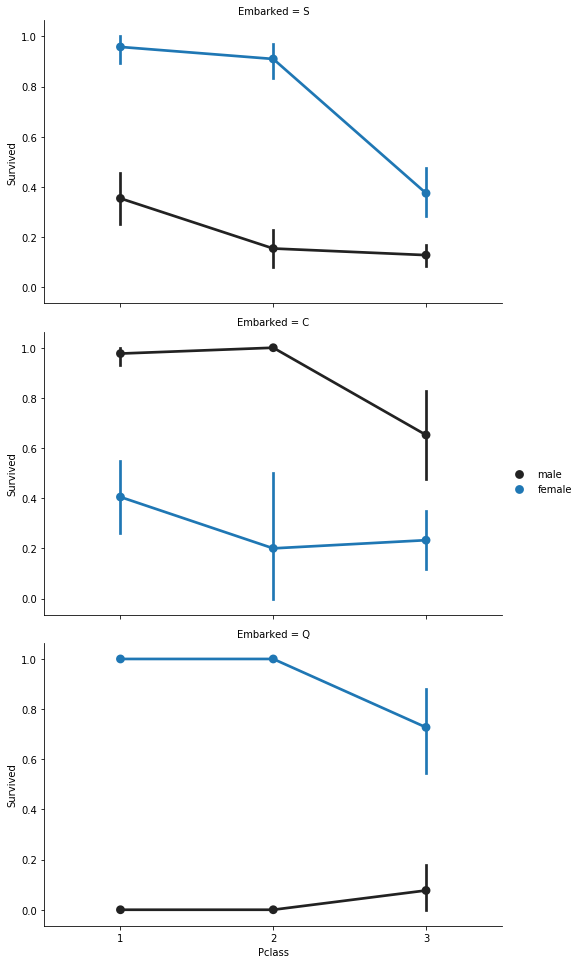

In [7]:
FacetGrid = sns.FacetGrid(train_data, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

**From this graph, we could know that male has high survival in Embarked=C, but lower chances to survive in Embarked S and Q, and in general people in PClass = first has high chance to survive that lower PClass, so we could say that Sex, PClass, and Embarked has relation with Survived**

### Features = Age, Sex to Y = Curvived

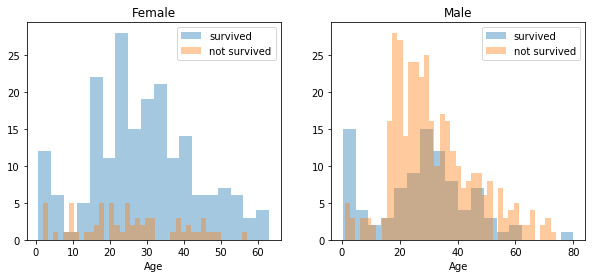

In [8]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

**men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40**

### Features = PClass to Y = Survived

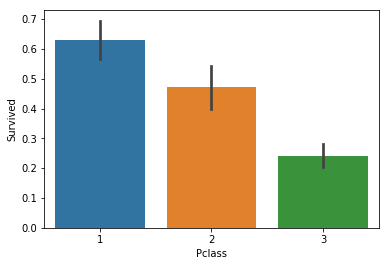

In [9]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

**As we can see,class 1 has high probability of survival but 3 has lowest, belows show that the historical graphs that different ages bins has different survival situation in different Pclass**

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


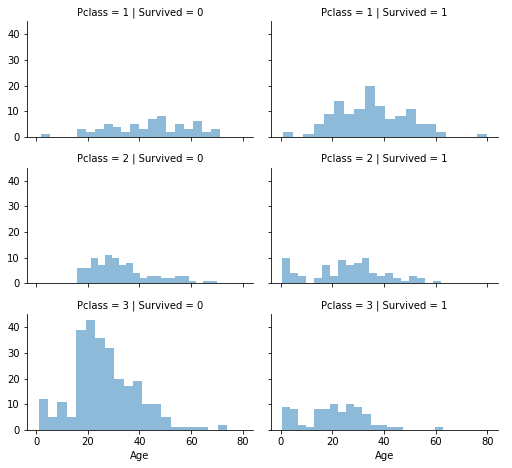

In [10]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Feature = SibSp or Parch to Y = Survived

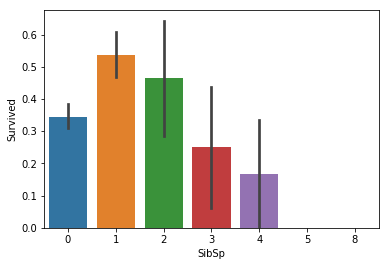

In [11]:
sns.barplot(x='SibSp', y='Survived', data=train_data)

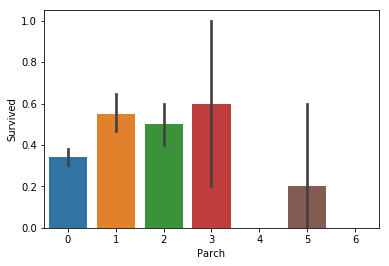

In [12]:
sns.barplot(x='Parch', y='Survived', data=train_data)

**As these shown, we know that people who has spouses or siblings numbers between 1 or 2 has the highest chance of survival and with 1 to 3 children or parents or have high chance to survived.**

## Conclusion of Analysis
By checking the numbers of missing values of each categories in training and test sets, we should,
* **drop "Cabin" feature because there are too many missing values for imputation, and Cabin is related with passenger's class and fare paid**
* **use median age as imputation to the "Age"**
* **use the most common boarding port as imputation to the "Embarked"**
* **Ticket may be dropped from our analysis as it contains high ratio of duplicates and there may not be a correlation between Ticket and survival.**
* **"PassengerId" may be dropped from training dataset as it does not contribute to survival**
* **"Name" may be dropped because it may not contribute directly to survival, however if the society is caste system and it related to the wealth and Pclass, it should be considered**


In conclusion, features we need are ("Age", "SibSp", "Parch", "Fare") as numerical features and ("Pclass", "Sex", "Embarked") as categorical feature to analysis the "Survived."

## Data Preprocessing

Drop unnecessary columns

In [13]:
# Remove examples where target is not defined
train_data = train_data[ train_data["Survived"].notnull() ]

# Separate target from features
y_train = train_data["Survived"]
train_data.drop(columns=["Survived",'Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

In [14]:
test_data.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

In [15]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


## The numeric pipeline

- select DataFrame columns identified as Numeric (variable `num_features`)
- perform a "missing value" transformation
    - replace missing value with median value of the feature

In [16]:
num_features = ["Age", "SibSp", "Parch", "Fare"]
num_transformers= Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])
num_pipeline = ColumnTransformer( transformers=[ ("numeric", num_transformers, num_features)])

## The non-numeric pipeline
- select DataFrame columns identified as Categorical (variable `cat_features`)
- perform a "missing value" transformation
    - replace missing value with the value of the feature that occurs most often
- perform a "to categorical" transformation on `Sex`

In [17]:
cat_features = ["Sex", "Pclass","Embarked" ]
cat_transformers= Pipeline(steps=[  ('imputer', SimpleImputer(strategy="most_frequent")),
                                    ('cat_encoder', OneHotEncoder(sparse=False))
                                 ] )
cat_pipeline = ColumnTransformer( transformers=[ ("categorical", cat_transformers, cat_features) ] )

## Combining the numeric and categorical pipelines: `ColumnTransformer`

The "official" way to combine pipelines in `sklearn` is via the `FeatureUnion`
- You must manually select the features of each type
- Apply the corresponding Pipelines
- "Glue together" (horizontally) the results of the Pipelines

We will use the experimental `ColumnTransformer`, which combines all these steps

In [18]:
preprocess_pipeline = ColumnTransformer(
    transformers=[ ("numeric", num_transformers, num_features),
                   ("categorical", cat_transformers, cat_features)])

In [19]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_test = preprocess_pipeline.fit_transform(test_data)

Avoid dummy variable traps, however, the columns deleted do matter to the Avg cross validation score

In [20]:
X_train = np.delete(X_train,np.s_[5,8,10],1)
X_test = np.delete(X_test,np.s_[5,8,10],1)

## Fit model

In [21]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
scores = cross_val_score(classifier, X_train, y_train, cv=5)
model = "Naive Bayes"
cross_val_avg = np.mean(scores)

print("{m:s}: Avg cross val score = {sc:3.6f}".format(m=model, sc=cross_val_avg) )

Naive Bayes: Avg cross val score = 0.784606


In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [24]:
predictions = cross_val_predict(classifier, X_train, y_train, cv=5)
cm = confusion_matrix(y_train, predictions)
accuracy = (cm[0][0]+cm[1][1])/cm.sum()
print("{m:s}: Accuracy = {a:.6f}".format(m=model, a=accuracy) )

Naive Bayes: Accuracy = 0.784512


## Fine Tune

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
parameters = [{'var_smoothing':[1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12]}]
grid_search = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 5,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters =  grid_search.best_params_
print('the best accuracy is {0}, and best parameters are {1}'.format(best_accuracy,best_parameters))

the best accuracy is 0.7890011223344556, and best parameters are {'var_smoothing': 1e-05}


***So, the best hyperparameters for Bayes Model in this model is using var_smoothing = 1e-05***

# Create a Logistic Regression model with minimal feature engineering

Create a Logistic Regression classifier using only transformations that are absolutely necessary,
for example
- dealing with missing features
- categorical transformations

In [27]:
# New version of sklearn will give a warning if you don't specify a solver (b/c the default solver -- liblinear -- will be replaced in future)
logistic = linear_model.LogisticRegression(solver='liblinear')
logistic.fit(X_train, y_train)
scores = cross_val_score(logistic, X_train, y_train, cv=5)
model = "Logistic Regression, version 0"
cross_val_avg = np.mean(scores)

print("{m:s}: Avg cross val score = {sc:3.6f}".format(m=model, sc=cross_val_avg) )

Logistic Regression, version 0: Avg cross val score = 0.795786


In [28]:
predictions = cross_val_predict(logistic, X_train, y_train, cv=5)
cm = confusion_matrix(y_train, predictions)
accuracy = (cm[0][0]+cm[1][1])/cm.sum()
print("{m:s}: Accuracy = {a:.6f}".format(m=model, a=accuracy))

Logistic Regression, version 0: Accuracy = 0.795735


## Fine Tune of the Logistic Regression

In [29]:
parameters = [{'C':[1,10,100,1000],'max_iter':[100,1000,10000],'penalty':['l1','l2']}]
grid_search = GridSearchCV(estimator = logistic,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 5,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters =  grid_search.best_params_
print('the best accuracy is {0}, and best parameters are {1}'.format(best_accuracy,best_parameters))

the best accuracy is 0.7957351290684624, and best parameters are {'C': 1, 'max_iter': 100, 'penalty': 'l2'}


***Conclusion: This fine tune shows us that we can use the default hyperparameters that C=1, max_iter=100, penalty = l2***

# Perform feature engineering and create another Logistic Regression classifier

Use transformations and creation of new features to improve your first Logistic Regression classifier.

The first set of  transformations require you to convert `Age` from continuous to buckets/bins.
This means choosing how many buckets/bins and what the boundaries are.

You will make two different choices for the buckets and report the accuracy of each.
You should *clearly explain* why you made the choices that you did (based on logic, Exploratory Data Analysis, etc.).

The steps are:
- choose a set of buckets and compare your Accuracy out of sample with the first Logistic Regression classifier
- choose a *second* set of buckets and compare your Accuracy out of sample with the first Logistic Regression classifier

So you will answer two nearly identical questions.  Please report the **best** result in the **second answer**.

In [30]:
from sklearn.preprocessing import Imputer

In [31]:
train_data = pd.read_csv( os.path.join(TITANIC_PATH, "train.csv") )
train_data['Age'].fillna((train_data['Age'].median()), inplace=True)
age_survived = train_data[train_data.Survived == 1].Age
age_dead = train_data[train_data.Survived == 0].Age

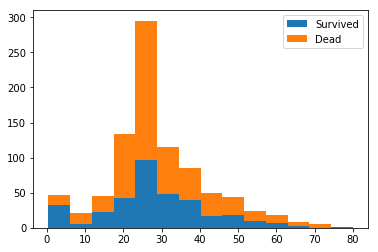

In [32]:
plt.hist([age_survived, age_dead],14, stacked=True, label=['Survived','Dead'])
plt.legend()

In [33]:
train_data = pd.read_csv( os.path.join(TITANIC_PATH, "train.csv") )
test_data = pd.read_csv( os.path.join(TITANIC_PATH, "test.csv") )

In [34]:
print('Max Age: ', train_data.Age.max())
print('Min Age: ', train_data.Age.min())

Max Age:  80.0
Min Age:  0.42


**Since the data show us the age range, we can play with it by creating age buckets/bins and treat them as numerical data first**

In [35]:
# Separate target from features
y_train = train_data["Survived"]
train_data.drop(columns=["Survived",'Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)
test_data.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

In [36]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X): 
        return X[self.attribute_names]

    
# orders of transformations do matter to the analysis!!!!
# prepare for categorical pipeline
cat_features = ["Sex", "Pclass","Embarked" ]
cat_pipeline = Pipeline([("select_cat", DataFrameSelector(cat_features)),
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False))])
    
# prepare for numerical pipeline
num_features = ["Age", "SibSp", "Parch", "Fare"]
num_pipeline = Pipeline([("select_numeric", DataFrameSelector( num_features )),
                        ("imputer", SimpleImputer(strategy="median")),
                        ])

# combination of two transformation pipeline
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),("cat_pipeline", cat_pipeline)])

**First I will use imputer to fill in the missing data of "Age", then use the following transformation to split ages to different bins**

In [37]:
class AgetoBins(BaseEstimator, TransformerMixin): # create bins over here
    def __init__(self, n=10):
        self.n = n
    def fit(self,X, y=None):
        return self
    def transform(self, X, y=None):
        X[:,0] = X[:,0] // self.n * self.n
        return X

**Following case is with 20 bins**

In [38]:
AB = AgetoBins(n=20)

In [39]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_test = preprocess_pipeline.fit_transform(test_data)
X_train = AB.transform(X_train)
X_test = AB.transform(X_test)
X_train = np.delete(X_train,np.s_[5,8,10],1)
X_test = np.delete(X_test,np.s_[5,8,10],1)

In [40]:
logistic = linear_model.LogisticRegression(solver='liblinear')
logistic.fit(X_train, y_train)

scores = cross_val_score(logistic, X_train, y_train, cv=5)
model = "Logistic Regression, version 0"
cross_val_avg = np.mean(scores)
print("{m:s}: Avg cross val score = {sc:3.6f}".format(m=model, sc=cross_val_avg) )

Logistic Regression, version 0: Avg cross val score = 0.793501


In [41]:
predictions = cross_val_predict(logistic, X_train, y_train, cv=5)
cm = confusion_matrix(y_train, predictions)
accuracy = (cm[0][0]+cm[1][1])/cm.sum()
print("{m:s}: Accuracy = {a:.6f}".format(m=model, a=accuracy))

Logistic Regression, version 0: Accuracy = 0.793490


**Following case is with 14 bins which is better**

In [42]:
AB2 = AgetoBins(14)

In [43]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_test = preprocess_pipeline.fit_transform(test_data)
X_train = AB2.transform(X_train)
X_test = AB2.transform(X_test)
X_train = np.delete(X_train,np.s_[5,8,10],1)
X_test = np.delete(X_test,np.s_[5,8,10],1)

In [44]:
logistic = linear_model.LogisticRegression(solver='liblinear')
logistic.fit(X_train, y_train)

scores = cross_val_score(logistic, X_train, y_train, cv=5)
model = "Logistic Regression, version 0"
cross_val_avg = np.mean(scores)
print("{m:s}: Avg cross val score = {sc:3.6f}".format(m=model, sc=cross_val_avg) )

Logistic Regression, version 0: Avg cross val score = 0.795786


In [45]:
predictions = cross_val_predict(logistic, X_train, y_train, cv=5)
cm = confusion_matrix(y_train, predictions)
accuracy = (cm[0][0]+cm[1][1])/cm.sum()
print("{m:s}: Accuracy = {a:.6f}".format(m=model, a=accuracy))

Logistic Regression, version 0: Accuracy = 0.795735


## Fine Tune of the Logistic Regression

In [46]:
parameters = [{'C':[1,10,100,1000],'max_iter':[100,1000,10000],'penalty':['l1','l2']}]
grid_search = GridSearchCV(estimator = logistic,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 5,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters =  grid_search.best_params_
print('the best accuracy is {0}, and best parameters are {1}'.format(best_accuracy,best_parameters))

the best accuracy is 0.7957351290684624, and best parameters are {'C': 1, 'max_iter': 100, 'penalty': 'l2'}


***Conlusion: This fine tune shows us that we can use the default hyperparameters that C=1, max_iter=100, penalty = l2***

## Age bucket: categorical or numeric ? 

Using your best bucketing choice (the second one above)
- What is the accuracy when you treat the buckets as numeric ?
- What is the accuracy when you treat the buckets as categorical ?


**n = 14 # best numbers of bins we get from above if we cheated it as numerical, and the average cross validation score is 0.795786**

**Right now, we treated age buckets as categorical features with 14 bins**
* first I only changed the AgetoBins to AgetoBins2
* second, we still using num_pipeline above to fill in the missing data in "Age" with median
* third, use AgetoBins2 to convert ages to different bins
* last, transform different age bins to dummy variables and delete one of the columns to avoid dummy trap

In [47]:
class AgetoBins2(BaseEstimator, TransformerMixin): # create bins over here
    def __init__(self, n=10):
        self.n = n
    def fit(self,X, y=None):
        return self
    def transform(self, X, y=None):
        X[:,0] = X[:,0] // self.n
        return X

In [48]:
AB2 = AgetoBins2(14)

In [49]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_test = preprocess_pipeline.fit_transform(test_data)
X_train = AB2.transform(X_train)
X_test = AB2.transform(X_test)
X_train = np.delete(X_train,np.s_[5,8,10],1)
X_test = np.delete(X_test,np.s_[5,8,10],1)

**deal with categorical data "Age" in X_train and X_test, transform it to be dummy variables and avoid the dummy trap**

In [50]:
onehotencoder_X = OneHotEncoder(categorical_features=[0])
X_train = onehotencoder_X.fit_transform(X_train).toarray()

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [51]:
X_train = np.delete(X_train,4,1)

In [52]:
logistic = linear_model.LogisticRegression(solver='liblinear')
logistic.fit(X_train, y_train)

scores = cross_val_score(logistic, X_train, y_train, cv=5)
model = "Logistic Regression, version 0"
cross_val_avg = np.mean(scores)
print("{m:s}: Avg cross val score = {sc:3.6f}".format(m=model, sc=cross_val_avg) )

Logistic Regression, version 0: Avg cross val score = 0.803614


In [53]:
predictions = cross_val_predict(logistic, X_train, y_train, cv=5)
cm = confusion_matrix(y_train, predictions)
accuracy = (cm[0][0]+cm[1][1])/cm.sum()
print("{m:s}: Accuracy = {a:.6f}".format(m=model, a=accuracy))

Logistic Regression, version 0: Accuracy = 0.803591


**As we can see, if we treated Age buckets as categorical data, then the average cross validation score is higher than we treated them as numerical data**

## Fine Tune of the Logistic Regression

In [54]:
parameters = [{'C':[1,10,100,1000],'max_iter':[100,1000,10000],'penalty':['l1','l2']}]
grid_search = GridSearchCV(estimator = logistic,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 5,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters =  grid_search.best_params_
print('the best accuracy is {0}, and best parameters are {1}'.format(best_accuracy,best_parameters))

the best accuracy is 0.8058361391694725, and best parameters are {'C': 1, 'max_iter': 100, 'penalty': 'l1'}


***Conclusion: This fine tune shows us that we can use the hyperparameters that C=1, max_iter=100, penalty = l1, so the best accuracy is 0.805836 which is higher than 0.803591***

***Note: penalty should change l2 to l1***

# (Extra credit)  Perform more feature engineering

We will award extra points for each (up to a maximum of 3) transformation  judged to be well thought out.
This means that *you must clearly explain* your ideas, experiments and results.

**Question**
Replace the 0 values in the following cell with your answers, and execute the print statements
- Also replace the "???" with a description of your feature engineering.

Repeat this cell for each new feature engineering/transformation that you submit.

In [55]:
train_data = pd.read_csv( os.path.join(TITANIC_PATH, "train.csv") )
test_data = pd.read_csv( os.path.join(TITANIC_PATH, "test.csv") )

Analysis if we need new features or drop some features, followings are my guess:
* we need to drop "PassengerId", and "Ticket".
* May need to combine features, "SibSp" and "Parch"， maybe exist colinearity, so we delete "Parch" first for in case
* As guessing, we think people who lived close to "deck" had high probability to survive, so we need to do something with "Cabin"
* Adding "title" as a new feature from "Name" then, we delete the "Name"
* "Fare" should be converted to buckets because as we know fares are group by different cabins
* "Age" should be converted to buckets as well

1. dropping "Name", "PassengerId", and "Ticket" features

In [56]:
train_data.drop(columns=['Ticket', 'PassengerId'], inplace=True)
test_data.drop(columns=['Ticket', 'PassengerId'], inplace=True)

2. adding new feature,"relatives", and analysis if we need it

In [57]:
data = [train_data, test_data]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


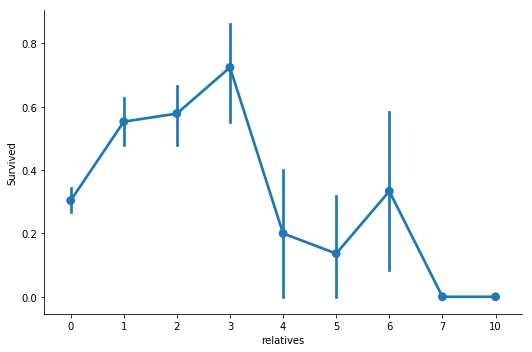

In [58]:
axes = sns.factorplot('relatives','Survived', data=train_data, aspect = 1.5)

**From here we can know that, people have 1-3 relatives had high probability of surviving, so we create "relatives" as our new feature**

3. create new feature, "Deck", from "Cabin" and then drop "Cabin"
    to create "Deck" we need 

In [59]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 9, "T":0,}
data = [train_data, test_data]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['deck'] = dataset['Cabin'].map(lambda x: deck[x[0]])
# we can now drop the cabin feature
train_data.drop(['Cabin'], axis=1, inplace=True)
test_data.drop(['Cabin'], axis=1, inplace=True)

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


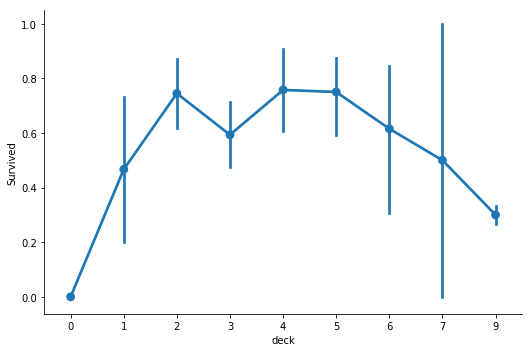

In [60]:
axes = sns.factorplot('deck','Survived', data=train_data, aspect = 1.5)

**As we see, deck 2,4,5 had high surviving probabilities**

4. Adding "title" and delete "Name"

In [61]:
data = [train_data, test_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for d in data:
    # extract titles
    d['title'] = d.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    d['title'] = d['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    d['title'] = d['title'].replace('Mlle', 'Miss')
    d['title'] = d['title'].replace('Ms', 'Miss')
    d['title'] = d['title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    d['title'] = d['title'].map(titles)
    # filling NaN with 0, to get safe
    d['title'] = d['title'].fillna(0)
train_data.drop(['Name'], axis=1, inplace=True)
test_data.drop(['Name'], axis=1, inplace=True)

5. Convert "Age" and "Fare" to buckets

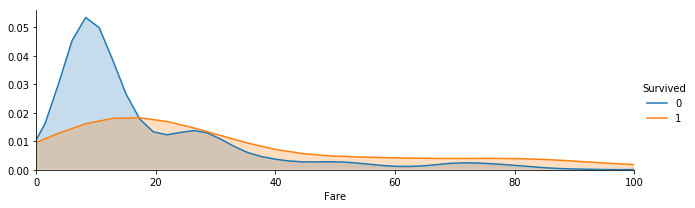

In [62]:
facet = sns.FacetGrid(train_data, hue = "Survived", aspect = 3)
facet.map(sns.kdeplot,'Fare',shade = True)
facet.set(xlim = (0,train_data['Fare'].max()))
plt.xlim(0,100)
facet.add_legend()
plt.show()

In [63]:
y_train = train_data.Survived
train_data.drop(['Survived','Parch'], axis=1, inplace=True)

In [64]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X): 
        return X[self.attribute_names]

    
# orders of transformations do matter to the analysis!!!!
# prepare for categorical pipeline
cat_features = ["Sex", "Pclass","Embarked","title"]
cat_pipeline = Pipeline([("select_cat", DataFrameSelector(cat_features)),
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False))])
    
# prepare for numerical pipeline
num_features = ["Age", "Fare", "relatives", "deck", "SibSp"]
num_pipeline = Pipeline([("select_numeric", DataFrameSelector( num_features )),
                        ("imputer", SimpleImputer(strategy="median"))])

# combination of two transformation pipeline
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),("cat_pipeline", cat_pipeline)])

In [65]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_test = preprocess_pipeline.fit_transform(test_data)

In [66]:
class toBins3(BaseEstimator, TransformerMixin): # create bins over here
    def fit(self,X, y=None):
        return self
    def transform(self, X, y=None):
        X[:,0] = X[:,0] // 14
        
        X[X[:,1] <= 17, 1] = 0
        X[(X[:,1] > 17) & (X[:,1] <= 30), 1] = 1
        X[(X[:,1] > 30) & (X[:,1] <= 100), 1] = 2
        X[(X[:,1] > 100), 1] = 3
        return X

In [67]:
AB3 = toBins3()
X_train = AB3.transform(X_train)
X_test = AB3.transform(X_test)
X_train = np.delete(X_train,np.s_[7,10,12],1)
X_test = np.delete(X_test,np.s_[7,10,12],1)

6. Apply models

avoid dummy trap from deleting one column from Age

In [68]:
onehotencoder_X = OneHotEncoder(categorical_features=[0])
X_train = onehotencoder_X.fit_transform(X_train).toarray()
X_train = np.delete(X_train,4,1)
X_test = onehotencoder_X.fit_transform(X_test).toarray()
X_test = np.delete(X_test,4,1)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.

avoid dummy trap from deleting one column from Fare

In [69]:
onehotencoder_X = OneHotEncoder(categorical_features=[5])
X_train = onehotencoder_X.fit_transform(X_train).toarray()
X_train = np.delete(X_train,8,1)
X_test = onehotencoder_X.fit_transform(X_test).toarray()
X_test = np.delete(X_test,8,1)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.

avoid dummy trap from deleting one column from title

In [70]:
X_train = np.delete(X_train,-3,1)
X_test = np.delete(X_test,-3,1)

In [71]:
logistic = linear_model.LogisticRegression(solver='liblinear')
logistic.fit(X_train, y_train)

scores = cross_val_score(logistic, X_train, y_train, cv=5)
model = "Logistic Regression, version 0"
cross_val_avg = np.mean(scores)
print("{m:s}: Avg cross val score = {sc:3.6f}".format(m=model, sc=cross_val_avg) )

Logistic Regression, version 0: Avg cross val score = 0.817078


In [72]:
predictions = cross_val_predict(logistic, X_train, y_train, cv=5)
cm = confusion_matrix(y_train, predictions)
accuracy = (cm[0][0]+cm[1][1])/cm.sum()
print("{m:s}: Accuracy = {a:.6f}".format(m=model, a=accuracy))

Logistic Regression, version 0: Accuracy = 0.817059


## Fine Tune of the Logistic Regression

In [73]:
parameters = [{'C':[1,10,100,1000],'max_iter':[100,1000,10000],'penalty':['l1','l2']}]
grid_search = GridSearchCV(estimator = logistic,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 5,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters =  grid_search.best_params_
print('the best accuracy is {0}, and best parameters are {1}'.format(best_accuracy,best_parameters))

the best accuracy is 0.8170594837261503, and best parameters are {'C': 1, 'max_iter': 100, 'penalty': 'l2'}


***Conclusion: This fine tune shows us that we can use the default hyperparameters that C=1, max_iter=100, penalty = l2***

# (Extra, extra credit) Contest !

Come up with your best model for the Titanic !  Use any model and whatever feature engineering you'd like.

We will evaluate your model on a held-out dataset.  Top scorers will get extra credit.

## Rules
- You *may not* include any packages that are not part of the standard installation
    - they won't run on the grader's machine
- Your feature engineering *must* deal with missing data for all attributes
    - the evaluation set *will* have missing values for some features
    

**Question**
Replace the 0 values in the following cell with your answers, and execute the print statements

## I will use my data in Extra credit part

**here I compare five models results, and I choose the highest score one as my final training model**

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

DecisionTree = DecisionTreeClassifier()
forest = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(gamma="auto")
KNN = KNeighborsClassifier(n_neighbors = 13)

for name, clf in {"Logistic": logistic,"SVM": svm,"Random Forest": forest,"Decision Tree": DecisionTree,"KNN": KNN}.items():
    _= clf.fit(X_train, y_train)

    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print("Model: {m:s} avg cross val score={s:3.6f}\n".format(m=name, s=scores.mean()) )

Model: Logistic avg cross val score=0.817078

Model: SVM avg cross val score=0.827184

Model: Random Forest avg cross val score=0.816036

Model: Decision Tree avg cross val score=0.802553

Model: KNN avg cross val score=0.811497



**Since SVM model gave me the highest average cross validation score, I will use this model as my final model**

In [75]:
title = "Titanic contest"
scores = cross_val_score(svm, X_train, y_train, cv=5)
model = "Logistic Regression, version 0"
cross_val_avg = np.mean(scores)
print("{m:s}: Avg cross val score = {sc:3.6f}".format(m=title, sc=cross_val_avg))

predictions = cross_val_predict(svm, X_train, y_train, cv=5)
cm = confusion_matrix(y_train, predictions)
accuracy = (cm[0][0]+cm[1][1])/cm.sum()
print("{m:s}: Accuracy = {a:.6f}".format(m=model, a=accuracy))

Titanic contest: Avg cross val score = 0.827184
Logistic Regression, version 0: Accuracy = 0.827160


## Fine Tune of the SVM


In [76]:
parameters = [{'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.5,0.1,0.01,0.001,0.0001]},
             {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]}]
grid_search = GridSearchCV(estimator = svm,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 5,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters =  grid_search.best_params_
print('the best accuracy is {0}, and best parameters are {1}'.format(best_accuracy,best_parameters))

the best accuracy is 0.8294051627384961, and best parameters are {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


***Conclusion: the best hyperparameters are C= 10, gamma = 0.01, kernel = rbf; from that our accuracy increases to 0.829405 from 0.827194***

In [77]:
print("Done!")

Done!
